# Nutrition, exercise and weight
3rd May 2021

Data from myfitnesspal from 2018 to 2021 detailing nutition, exercise level and my weight. Exploration of data and major trends in order to isolate factors leading to weight lose!

This notebook contains data wrangling to pull together the three csv files of exercise, nutrition and weight. They are of different lengths and require some filtering to make a master dataframe for analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

%matplotlib inline

In [162]:
## Import weight data
wt = pd.read_csv('raw_files/Measurements.csv')
wt['Date'] = pd.to_datetime(wt['Date'])

## Import nutrition data
nu = pd.read_csv('raw_files/Nutrition.csv')
nu['Date'] = pd.to_datetime(nu['Date'])

# ## Import exercise data
ex = pd.read_csv('raw_files/Exercise.csv')
ex['Date'] = pd.to_datetime(ex['Date'])

In [163]:
wt.info() 
print('\n')
nu.info()
print('\n')
ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    80 non-null     datetime64[ns]
 1   Weight  80 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 730 non-null    datetime64[ns]
 1   Meal                 730 non-null    object        
 2   Calories             730 non-null    float64       
 3   Fat (g)              730 non-null    float64       
 4   Saturated Fat        730 non-null    float64       
 5   Polyunsaturated Fat  730 non-null    float64       
 6   Monounsaturated Fat  730 non-null    float64       
 7   Trans Fat            730 non-null    f

## Weight

What time period is covered, how patchy and what is the range (in Kg)?

In [5]:
wt.describe()

,Weight
count,80.000000
mean,74.788750
std,3.419453
min,67.300000
25%,71.225000
50%,76.150000
75%,77.025000
max,80.400000


In [6]:
## Weight ##
oldest = wt['Date'].iloc[0]
newest = wt['Date'].iloc[-1]
tot = len(wt)
print(f'The first weight record is: {oldest} \nThe last record is: {newest} \nThere are {tot} records in {newest-oldest} days')

## Nutrition ##
nu_oldest = nu['Date'].iloc[0]
nu_newest = nu['Date'].iloc[-1]
nu_total = len(nu)
print(f'\nThe first nutrition record is: {nu_oldest} \nThe last record is: {nu_newest}\nThere are {nu_total} records in {nu_newest-nu_oldest} days')

## Exercise ##
ex_oldest = ex['Date'].iloc[0]
ex_newest = ex['Date'].iloc[-1]
ex_total = len(ex)
print(f'\nThe first exercise record is: {ex_oldest} \nThe last record is: {ex_newest}\nThere are {ex_total} records in {ex_newest-ex_oldest} days')


The first weight record is: 2011-04-07 00:00:00 
The last record is: 2021-04-21 00:00:00 
There are 80 records in 3667 days 00:00:00 days

The first nutrition record is: 2018-04-15 00:00:00 
The last record is: 2021-04-21 00:00:00
There are 730 records in 1102 days 00:00:00 days

The first exercise record is: 2011-04-07 00:00:00 
The last record is: 2021-04-21 00:00:00
There are 320 records in 3667 days 00:00:00 days


In [3]:
wt.index = wt['Date']
wt.head()

,Date,Weight
Date,,
2011-04-07,2011-04-07,72.0
2011-04-09,2011-04-09,70.3
2011-04-15,2011-04-15,70.3
2011-04-21,2011-04-21,71.0
2011-04-26,2011-04-26,70.3


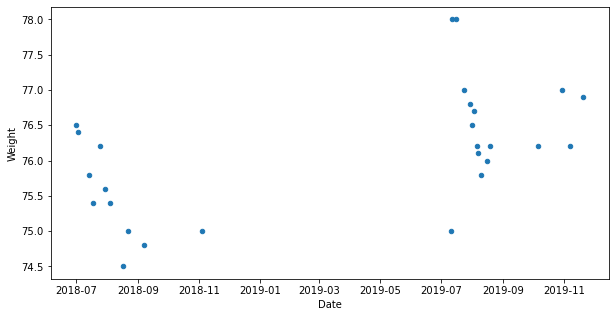

In [8]:
##Is there an issue with the weights?
wt['2018-07-01':'2019-12-01'].plot(x='Date',y='Weight', kind='scatter', figsize=(10,5));

In [94]:
""" 
That looks weird - a 3kg weight gain in 1 day! Since there is a significant time gap between November 2018 and July 2019, 
assume it's a typo and should be 78Kg for 2019-07-11 instead of 75kg.
"""

cut_wt = wt['2019-07-01':'2019-08-15']
cut_wt.head()

,Date,Weight
Date,,
2019-07-11,2019-07-11,75.0
2019-07-12,2019-07-12,78.0
2019-07-16,2019-07-16,78.0
2019-07-24,2019-07-24,77.0
2019-07-30,2019-07-30,76.8


In [4]:
wt.loc['2019-07-11','Weight'] = 78.0 #change single value by date
wt.loc['2019-07-01':'2019-07-15']

,Date,Weight
Date,,
2019-07-11,2019-07-11,78.0
2019-07-12,2019-07-12,78.0


Since there is only c. 2 years of nutritional information but about 10 years of both exercise and weight, concatenate these two longer dfs to nutrition.

In [5]:
# Make a new time series as days
new_dates = pd.date_range(start=wt['Date'].iloc[0], end=wt['Date'].iloc[-1], freq='D')

# Make a dummy dataframe for the kg column
wt_df = pd.DataFrame(index=new_dates, columns=['Date1'])
wt_df['Date1'] = new_dates #Leaving as NaN will not allow for concat or merge so fill with a placeholder val.
wt_df.head()

,Date1
2011-04-07,2011-04-07
2011-04-08,2011-04-08
2011-04-09,2011-04-09
2011-04-10,2011-04-10
2011-04-11,2011-04-11


In [6]:
## Concat extended, infiled weights series with old weights values
wts = pd.concat([wt_df, wt], axis=1)
wts = wts.drop(['Date'], axis=1) #drop old date column
wts.rename(columns={'Date1':'Date'}, inplace=True) #rename new weights column
wts['Weight'] = wts['Weight'].interpolate(method='linear', limit_direction='forward', axis=0) #linear intepolation

In [7]:
print(len(wts))
print(len(wt_df))
wts.tail()

3668
3668


,Date,Weight
2021-04-17,2021-04-17,79.671429
2021-04-18,2021-04-18,79.728571
2021-04-19,2021-04-19,79.785714
2021-04-20,2021-04-20,79.842857
2021-04-21,2021-04-21,79.900000


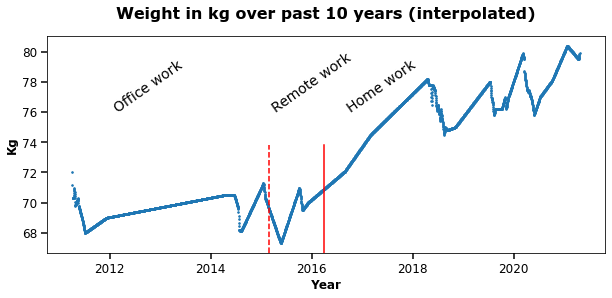

In [8]:
## What does the data look like? How patchy?
fig,ax = plt.subplots(figsize=(10,4))
plt.scatter(x=wts['Date'], y=wts['Weight'], s=2.5)
plt.axvline(pd.Timestamp('2015-03-1'), ymax=0.5, color='r', linestyle='--')
plt.axvline(pd.Timestamp('2016-03-31'), ymax=0.5, color='r')
plt.text(pd.Timestamp('2012-01-15'), 76, 'Office work', fontsize=14, rotation=35, fontname='Verdana')
plt.text(pd.Timestamp('2015-03-01'), 76, 'Remote work', fontsize=14, rotation=35, fontname='Verdana')
plt.text(pd.Timestamp('2016-08-30'),76, 'Home work', fontsize=14, rotation=35, fontname='Verdana')
plt.title('Weight in kg over past 10 years (interpolated)', fontsize=16, fontname='Verdana', weight='bold',y=1.05)
plt.ylabel('Kg', rotation=90, fontsize=12, weight='bold', fontname='Verdana')
plt.xlabel('Year', fontsize=12, weight='bold', fontname='Verdana')
ax.tick_params(direction='out', length=6, width=1.5, labelsize=12);
# plt.savefig('weight_over_time.jpeg',dpi=300,bbox_inches='tight');

**Mmm looks like a general weight gain after working from home**

In [9]:
## merge the infilled weight data with nutrition:
cut_df = pd.merge(nu, wts)
cut_df.tail()

,Date,Meal,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),...,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note,Weight
725,2021-04-20,Snacks,241.7,3.5,0.3,0.0,0.0,0.0,0.0,251.0,...,43.2,2.7,33.6,2.1,0.0,0.0,37.5,0.0,NaN,79.842857
726,2021-04-21,Breakfast,275.1,12.4,4.1,0.3,0.0,0.0,330.0,410.8,...,25.3,3.3,1.2,18.1,8.0,1668.0,4.6,25.2,NaN,79.900000
727,2021-04-21,Lunch,628.0,8.1,2.9,1.3,3.0,0.0,0.0,21.3,...,76.9,11.5,20.8,39.7,0.0,108.0,0.0,0.0,NaN,79.900000
728,2021-04-21,Dinner,449.3,19.0,8.5,0.2,4.8,0.0,6.3,41.0,...,34.1,5.0,3.1,34.2,3.3,7.5,1.5,1.1,NaN,79.900000
729,2021-04-21,Snacks,180.0,3.5,0.3,0.0,0.0,0.0,0.0,251.0,...,43.2,2.7,33.6,2.1,0.0,0.0,37.5,0.0,NaN,79.900000


In [10]:
len(cut_df['Weight'])

730

In [11]:
## Investigate exercsie df - what needs cutting and what is a background level if no walking/gym?
# ex.head()
# ex['Type'].unique() #'Strength', 'Cardio'
# ex['Type'].value_counts() #cardio=313, strength=7
cut_ex = ex.loc[ex['Type'] == 'Cardio'] #cut to just Cardio exercise
cut_ex.head()

,Date,Exercise,Type,Exercise Calories,Exercise Minutes,Sets,Reps Per Set,Kilograms,Steps,Note
5,2011-04-07,"Walking, 3.0 mph, mod. pace, walking dog",Cardio,176.0,45.0,NaN,NaN,NaN,NaN,NaN
6,2011-04-08,"Bicycling, 12-14 mph, moderate (cycling, bikin...",Cardio,427.0,45.0,NaN,NaN,NaN,NaN,NaN
7,2011-04-10,"Bicycling, 12-14 mph, moderate (cycling, bikin...",Cardio,468.0,50.0,NaN,NaN,NaN,NaN,NaN
8,2011-04-14,"Running (jogging), 10 mph (6 min mile)",Cardio,656.0,35.0,NaN,NaN,NaN,NaN,NaN
9,2011-04-14,"Walking, 3.0 mph, mod. pace, walking dog",Cardio,70.0,20.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#rename exercise calories and exercise minutes
cut_ex.rename(columns={'Exercise Calories': 'Exercise_cal', 'Exercise Minutes': 'Exercise_mins'}, inplace=True)
cut_ex.columns

c:\users\gjh2018\anaconda3\envs\bayesenv\lib\site-packages\pandas\core\frame.py:4298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['Date', 'Exercise', 'Type', 'Exercise_cal', 'Exercise_mins', 'Sets',
       'Reps Per Set', 'Kilograms', 'Steps', 'Note'],
      dtype='object')

In [39]:
#Drop unnecessary columns and add a background level column for calorie burn
cut_ex = cut_ex[['Date', 'Exercise_cal', 'Exercise_mins']]
cut_ex['background_cals'] = 50*24 #assume you burn 50 kcal per hour (range usually 45-55 even when sleeping)
cut_ex.index = cut_ex['Date']
cut_ex.head()

,Date,Exercise_cal,Exercise_mins,background_cals
Date,,,,
2011-04-07,2011-04-07,176.0,45.0,1200
2011-04-08,2011-04-08,427.0,45.0,1200
2011-04-10,2011-04-10,468.0,50.0,1200
2011-04-14,2011-04-14,656.0,35.0,1200
2011-04-14,2011-04-14,70.0,20.0,1200


In [40]:
## Looks like duplicate index and date values. These need grouping by date

# print(cut_ex_gb['background_cals'].unique())
cut_ex_gb = cut_ex.groupby(cut_ex.index).sum() #groupby the index and sum the other columns
cut_ex_gb.reset_index() #reset index after groupby
cut_ex_gb.loc[(cut_ex_gb['background_cals'] > 1200), 'background_cals'] = 1200 #convert background_cals back to baseline

print(cut_ex_gb['background_cals'].unique())
cut_ex_gb.head()


[1200]


,Exercise_cal,Exercise_mins,background_cals
Date,,,
2011-04-07,176.0,45.0,1200
2011-04-08,427.0,45.0,1200
2011-04-10,468.0,50.0,1200
2011-04-14,726.0,55.0,1200
2011-04-15,87.0,25.0,1200


In [50]:
## Use the wt_df if it stats at the same date as the cut_ex
# wt_df.head()
exs = pd.concat([wt_df, cut_ex_gb], axis=1)
exs.rename(columns={'Date1':'Date'}, inplace=True) #rename new weights column
exs[['Exercise_cal','Exercise_mins']] = exs[['Exercise_cal','Exercise_mins']].replace(np.nan,0) #NaN are just no exercise on a given date.
exs['background_cals'] = exs['background_cals'].replace(np.nan, 1200) #update background cals column
exs.head()

,Date,Exercise_cal,Exercise_mins,background_cals
2011-04-07,2011-04-07,176.0,45.0,1200.0
2011-04-08,2011-04-08,427.0,45.0,1200.0
2011-04-09,2011-04-09,0.0,0.0,1200.0
2011-04-10,2011-04-10,468.0,50.0,1200.0
2011-04-11,2011-04-11,0.0,0.0,1200.0


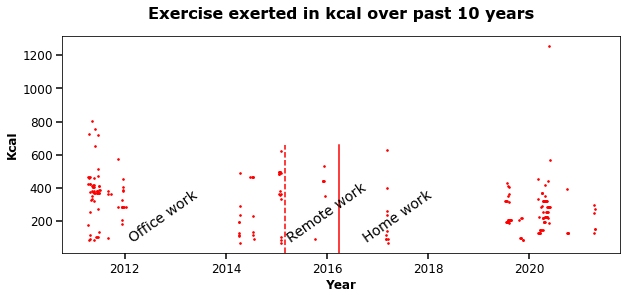

In [60]:
##What does exercise look like?
y_filter = exs.loc[exs['Exercise_cal'] >0] #filter out 0 kcal days

fig,ax = plt.subplots(figsize=(10,4))
plt.scatter(x=y_filter['Date'], y=y_filter['Exercise_cal'], s=2.5, color='red')
plt.axvline(pd.Timestamp('2015-03-1'), ymax=0.5, color='r', linestyle='--')
plt.axvline(pd.Timestamp('2016-03-31'), ymax=0.5, color='r')
plt.text(pd.Timestamp('2012-01-15'), 76, 'Office work', fontsize=14, rotation=35, fontname='Verdana')
plt.text(pd.Timestamp('2015-03-01'), 76, 'Remote work', fontsize=14, rotation=35, fontname='Verdana')
plt.text(pd.Timestamp('2016-08-30'),76, 'Home work', fontsize=14, rotation=35, fontname='Verdana')
plt.title('Exercise exerted in kcal over past 10 years', fontsize=16, fontname='Verdana', weight='bold',y=1.05)
plt.ylabel('Kcal', rotation=90, fontsize=12, weight='bold', fontname='Verdana')
plt.xlabel('Year', fontsize=12, weight='bold', fontname='Verdana')
ax.tick_params(direction='out', length=6, width=1.5, labelsize=12);

In [63]:
## Make a master dataframe of weight, nutrition and exercise. 
wts.to_csv('weights_master.csv')
exs.to_csv('Exercise_master.csv')
nu.to_csv('Nutrition_master.csv') #with multiple entries per day. Not grouped by date!

In [145]:
## group nutrition data into just days

nutri = nu.groupby(nu['Date']).sum()
nutri['Date'] = nutri.index
# nutri.reset_index()
nutri.head()

,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note,Date
Date,,,,,,,,,,,,,,,,,,,
2018-04-15,706.1,25.2,8.3,0.9,2.7,0.0,0.0,583.7,759.1,84.5,7.8,22.7,41.3,10.8,1801.4,37.5,15.2,0.0,2018-04-15
2018-04-16,1953.6,53.3,21.2,5.1,11.2,0.2,85.0,2453.3,2638.5,229.5,26.8,68.8,146.2,518.8,1920.7,42.4,53.6,0.0,2018-04-16
2018-04-17,1965.6,56.7,27.9,2.9,9.5,0.2,85.0,1934.0,2370.4,199.6,19.1,45.6,160.7,113.2,1864.2,38.1,34.9,0.0,2018-04-17
2018-04-18,1824.6,75.0,32.3,5.8,17.7,0.0,492.0,1492.4,1732.8,175.3,16.5,61.3,115.2,88.5,1813.5,56.8,23.3,0.0,2018-04-18
2018-04-19,1832.2,69.4,28.3,6.3,17.2,0.0,70.0,1915.4,3079.6,171.4,18.0,65.1,132.1,79.5,1947.5,31.7,36.2,0.0,2018-04-19


In [147]:
## Issues merging so make sure the index is in the same datetime as other df for exs and wts
new_nu_dates = pd.date_range(start=nutri['Date'].iloc[0], end=nutri['Date'].iloc[-1], freq='D') 

# Make a dummy dataframe for the nutri column
nu_df = pd.DataFrame(index=new_nu_dates, columns=['Date1'])
nu_df['Date1'] = new_nu_dates #Leaving as NaN will not allow for concat or merge so fill with a placeholder val.
# len(nu_df)
# nu_df.head()

## Concat extended, infiled nutrition series with old nutri df
nu_new = pd.concat([nu_df, nutri], axis=1)
nu_new = nu_new.drop(['Date'], axis=1) #drop old date column
nu_new.rename(columns={'Date1':'Date'}, inplace=True) #rename new weights column
nu_new.head()

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note
2018-04-15,2018-04-15,706.1,25.2,8.3,0.9,2.7,0.0,0.0,583.7,759.1,84.5,7.8,22.7,41.3,10.8,1801.4,37.5,15.2,0.0
2018-04-16,2018-04-16,1953.6,53.3,21.2,5.1,11.2,0.2,85.0,2453.3,2638.5,229.5,26.8,68.8,146.2,518.8,1920.7,42.4,53.6,0.0
2018-04-17,2018-04-17,1965.6,56.7,27.9,2.9,9.5,0.2,85.0,1934.0,2370.4,199.6,19.1,45.6,160.7,113.2,1864.2,38.1,34.9,0.0
2018-04-18,2018-04-18,1824.6,75.0,32.3,5.8,17.7,0.0,492.0,1492.4,1732.8,175.3,16.5,61.3,115.2,88.5,1813.5,56.8,23.3,0.0
2018-04-19,2018-04-19,1832.2,69.4,28.3,6.3,17.2,0.0,70.0,1915.4,3079.6,171.4,18.0,65.1,132.1,79.5,1947.5,31.7,36.2,0.0


In [149]:
# exs.head()
# wts.head()
# nu_new.head()

## Filter df by the entries for nutrition (i.e. those with no NaN)
nu_new = pd.concat([nu_new, exs, wts], axis=1)
nu_new = nu_new.loc[nu_new['Calories'] >0]
nu_new.tail()

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,...,Exercise_mins,background_cals,Date,Weight,Date,Exercise_cal,Exercise_mins,background_cals,Date,Weight
2021-04-17,2021-04-17,2566.8,100.5,31.1,1.7,5.4,1.0,150.0,2103.8,345.0,...,0.0,1200.0,2021-04-17,79.671429,2021-04-17,0.0,0.0,1200.0,2021-04-17,79.671429
2021-04-18,2021-04-18,1726.9,54.6,22.1,2.6,4.4,0.2,29.3,1476.8,948.5,...,28.0,1200.0,2021-04-18,79.728571,2021-04-18,299.0,28.0,1200.0,2021-04-18,79.728571
2021-04-19,2021-04-19,1572.8,48.1,19.8,1.8,3.0,0.5,561.0,1108.2,1458.9,...,30.0,1200.0,2021-04-19,79.785714,2021-04-19,151.0,30.0,1200.0,2021-04-19,79.785714
2021-04-20,2021-04-20,1792.3,51.4,18.3,1.2,8.8,0.0,6.3,909.7,933.3,...,55.0,1200.0,2021-04-20,79.842857,2021-04-20,276.0,55.0,1200.0,2021-04-20,79.842857
2021-04-21,2021-04-21,1532.4,43.0,15.8,1.8,7.8,0.0,336.3,724.1,719.1,...,30.0,1200.0,2021-04-21,79.900000,2021-04-21,151.0,30.0,1200.0,2021-04-21,79.900000


In [150]:
nu_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 193 entries, 2018-04-15 to 2021-04-21
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 193 non-null    datetime64[ns]
 1   Calories             193 non-null    float64       
 2   Fat (g)              193 non-null    float64       
 3   Saturated Fat        193 non-null    float64       
 4   Polyunsaturated Fat  193 non-null    float64       
 5   Monounsaturated Fat  193 non-null    float64       
 6   Trans Fat            193 non-null    float64       
 7   Cholesterol          193 non-null    float64       
 8   Sodium (mg)          193 non-null    float64       
 9   Potassium            193 non-null    float64       
 10  Carbohydrates (g)    193 non-null    float64       
 11  Fiber                193 non-null    float64       
 12  Sugar                193 non-null    float64       
 13  Protein (g)     

In [156]:
nu_new = nu_new.loc[:,~nu_new.columns.duplicated()] #get rid of duplicate columns for date.
nu_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 193 entries, 2018-04-15 to 2021-04-21
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 193 non-null    datetime64[ns]
 1   Calories             193 non-null    float64       
 2   Fat (g)              193 non-null    float64       
 3   Saturated Fat        193 non-null    float64       
 4   Polyunsaturated Fat  193 non-null    float64       
 5   Monounsaturated Fat  193 non-null    float64       
 6   Trans Fat            193 non-null    float64       
 7   Cholesterol          193 non-null    float64       
 8   Sodium (mg)          193 non-null    float64       
 9   Potassium            193 non-null    float64       
 10  Carbohydrates (g)    193 non-null    float64       
 11  Fiber                193 non-null    float64       
 12  Sugar                193 non-null    float64       
 13  Protein (g)     

In [158]:
nu_new.to_csv('master_nutrition_exercise_weight.csv')